In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sopt
from matplotlib.colors import LogNorm
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [17]:
def f(x):
    a = 1
    b = 100
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

def df(x):
    a = 1
    b = 100
    df1 = -2*(a-x[0]) - 4*b*(x[1]-x[0]**2)*x[0]
    df2 = 2*b*(x[1]-x[0]**2)
    return np.array([df1, df2])

xstar = np.array([1,1])

np.random.seed(1028)
x0 = np.array([-1.4, 1.1])

# Steepest Descent

In [18]:
def sd(x0, errors=None, xhistory=None):
    x = x0.copy()
    
    for k in range(1000):

        s = -df(x)

        def f1d(alpha):
            return f(x + alpha*s)
        alpha = sopt.golden(f1d)

        x = x + alpha * s

        errors.append(np.linalg.norm(x - xstar))
        xhistory.append(x)
        if errors[-1] < 1e-12:
            return x
    return x

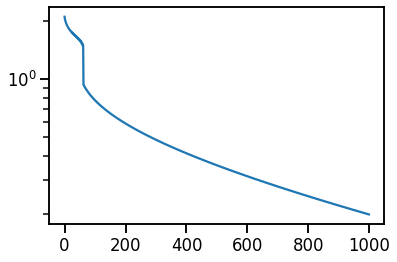

In [19]:
errors_sd = []
xhist_sd = [x0]
x = sd(x0, errors_sd, xhist_sd)
plt.semilogy(errors_sd)

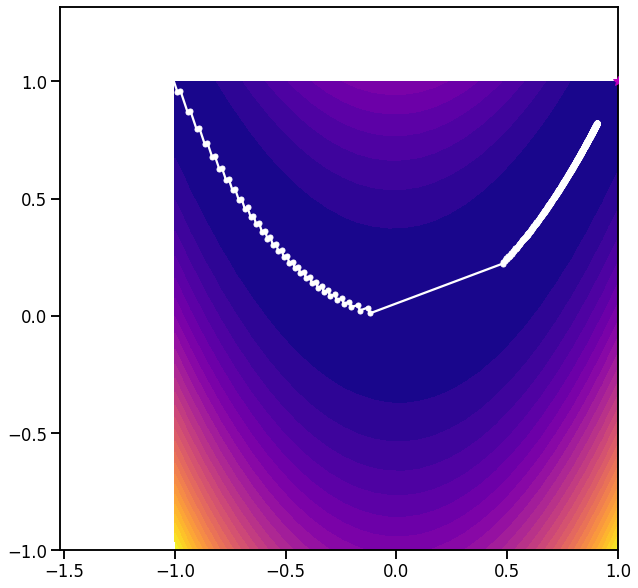

In [21]:
plt.figure(figsize=(10,10))
X = np.linspace(-1, 1, 30)
Y = np.linspace(-1, 1, 30)
X, Y = np.meshgrid(X, Y)
XY = np.vstack((X.ravel(), Y.ravel()))
Z = f(XY).reshape(X.shape)
plt.contourf(X, Y, Z, levels=30, cmap='plasma')
plt.plot(xstar[0], xstar[1], 'm*', ms=10, zorder=10)

xhist = np.array(xhist_sd).T
plt.plot(xhist[0], xhist[1], 'wo-', ms=5)

# BFGS

In [12]:
def bfgs(x0, errors=None, xhistory=None):
    x = x0.copy()
    B = np.eye(2)
    C = np.eye(2)
    
    for k in range(100):

        s = -C @ df(x)

        def f1d(alpha):
            return f(x + alpha*s)
        alpha = sopt.golden(f1d)

        xnew = x + alpha * s
        
        y = df(xnew) - df(x)
        
        Bnew = B + (1/np.dot(y, s))*np.outer(y, y) - (1/np.dot(B@s, s))*np.outer(B@s, B@s)
        
        u = s - C @ y
        Cnew = C + (1/np.dot(s,y))*np.outer(u, s) + (1/np.dot(s,y))*np.outer(s, u) - (np.dot(y,u)/np.dot(s,y)**2)*np.outer(s,s)
        
        B = Bnew
        x = xnew
        C = Cnew

        errors.append(np.linalg.norm(x - xstar))
        xhistory.append(x)
        if errors[-1] < 1e-12:
            return x
    return x

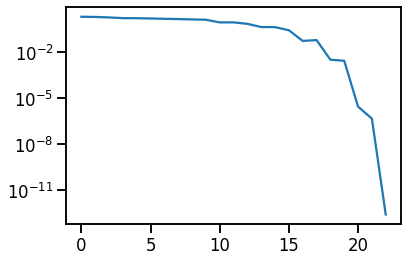

In [13]:
errors_bfgs = []
xhist_bfgs = [x0]
x = bfgs(x0, errors_bfgs, xhist_bfgs)
plt.semilogy(errors_bfgs)

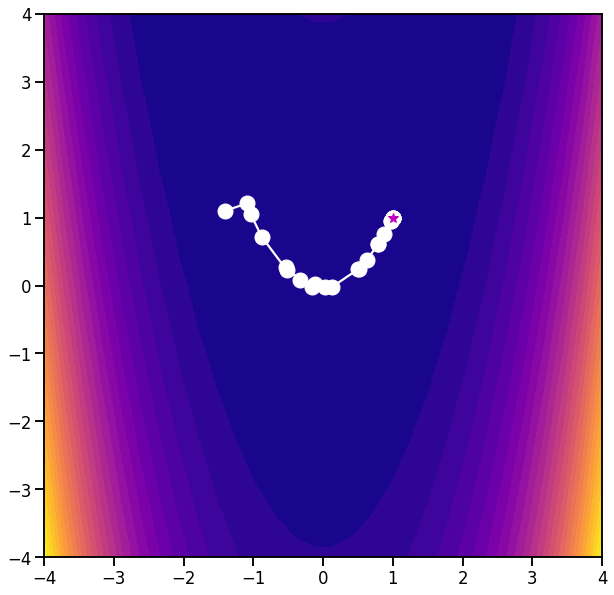

In [15]:
plt.figure(figsize=(10,10))
X = np.linspace(-4, 4, 30)
Y = np.linspace(-4, 4, 30)
X, Y = np.meshgrid(X, Y)
XY = np.vstack((X.ravel(), Y.ravel()))
Z = f(XY).reshape(X.shape)
plt.contourf(X, Y, Z, levels=30, cmap='plasma')
plt.plot(xstar[0], xstar[1], 'm*', ms=10, zorder=10)

xhist = np.array(xhist_bfgs).T
plt.plot(xhist[0], xhist[1], 'wo-', ms=15)